In [1]:
import pandas as pd
import openpyxl
import states
import scipy.stats as st
import numpy as np

In [2]:
# !pip install openpyxl

In [3]:
# read in files
gdp = pd.read_csv("gdp_by_state.csv")
legislators = pd.read_csv("legislators-current.csv")
states_df = pd.Series(states.us_state_to_abbrev).reset_index()

In [21]:
# rename gdp fields when needed, review quarters --> states are names
# gdp.rename(columns={'Unnamed: 1': 'Currency'}, inplace=True)
# gdp.drop(columns="GeoFips", inplace=True)
gdp.set_index("GeoName", inplace=True)
gdp

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
GeoName,,,,,,,,,,,,,,,,,,,,,
Alabama,104811.9,110212.0,115680.1,119851.7,122915.5,127505.0,134152.6,147715.2,158846.8,166469.0,...,183916.6,189245.5,194786.9,197406.9,202372.4,207368.4,215085.9,224046.9,231171.8,226896.5
Alaska,25810.8,24227.5,24744.3,26806.6,28494.1,29756.8,32037.9,35302.4,40356.6,45094.1,...,56896.3,58283.6,57247.7,56484.9,51490.9,50727.7,53089.3,54711.7,54547.1,49820.0
Arizona,132281.0,143302.6,155755.8,165110.7,171909.6,180522.3,193634.9,206541.1,227915.9,245957.0,...,260915.7,271440.0,278591.6,287666.6,299393.3,313081.4,330416.1,349907.5,369988.2,373719.0
Arkansas,59846.3,62396.7,66811.3,68678.5,70616.7,74113.9,78695.1,85199.6,90887.7,95875.1,...,105768.1,108492.1,113227.3,116139.4,117786.8,119152.4,122350.2,127306.5,130839.9,130750.7
California,1071117.0,1147520.4,1241899.7,1356975.4,1375761.3,1418429.6,1497918.7,1588177.4,1698560.4,1812210.0,...,2023500.0,2113096.4,2220389.9,2335286.5,2473555.9,2569634.0,2730973.9,2895101.0,3052645.2,3007187.7
Colorado,136898.7,150330.0,163763.3,180063.2,186695.8,190019.0,196126.5,204167.2,220783.7,232646.7,...,267516.1,276823.1,292140.5,309542.6,320721.1,329911.7,348898.1,371424.6,392218.0,382584.7
Connecticut,138331.8,145475.5,152287.5,165614.3,171216.6,173248.3,178702.2,195354.9,205214.6,219768.4,...,233158.7,240911.9,241517.4,246597.0,259487.8,263670.3,271582.6,280692.0,288109.1,276422.9
Delaware,33353.4,37106.0,40345.1,43451.3,46096.1,45508.3,47686.1,51353.7,52153.5,55174.4,...,61372.2,62354.6,61716.2,68354.7,71913.9,69355.0,68763.8,72488.0,77042.2,75786.5
District of Columbia,52503.6,54815.3,58819.2,61092.9,65442.9,69919.5,73957.1,80140.1,84867.6,88125.0,...,109730.4,112157.0,114540.1,119414.6,124604.7,129648.6,133391.2,139784.8,144405.7,144554.8


<AxesSubplot:>

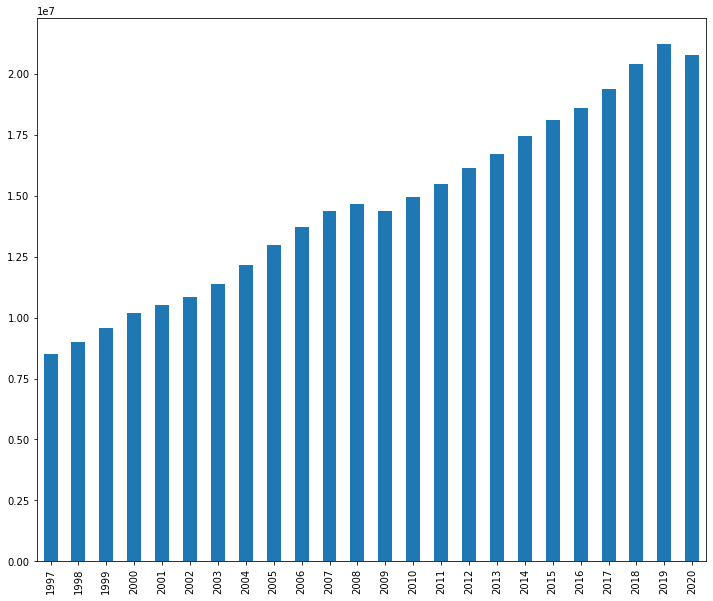

In [30]:
gdp.T.sum(axis=1).plot(kind="bar", figsize=(12,10))

In [6]:
# look at legislators --> states are abbreviations
legislators

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,...,opensecrets_id,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id
0,Brown,Sherrod,NaN,NaN,NaN,Sherrod Brown,1952-11-09,M,sen,OH,...,N00003535,S307,"H2OH13033,S6OH00163",5051.0,400050,27018.0,Sherrod Brown,NaN,29389.0,Sherrod Brown
1,Cantwell,Maria,NaN,NaN,NaN,Maria Cantwell,1958-10-13,F,sen,WA,...,N00007836,S275,"S8WA00194,H2WA01054",26137.0,300018,27122.0,Maria Cantwell,NaN,39310.0,Maria Cantwell
2,Cardin,Benjamin,L.,NaN,NaN,Benjamin L. Cardin,1943-10-05,M,sen,MD,...,N00001955,S308,"H6MD03177,S6MD03177",4004.0,400064,26888.0,Ben Cardin,NaN,15408.0,Ben Cardin
3,Carper,Thomas,Richard,NaN,NaN,Thomas R. Carper,1947-01-23,M,sen,DE,...,N00012508,S277,S8DE00079,663.0,300019,22421.0,Tom Carper,NaN,15015.0,Tom Carper
4,Casey,Robert,P.,Jr.,Bob,"Robert P. Casey, Jr.",1960-04-13,M,sen,PA,...,N00027503,S309,S6PA00217,47036.0,412246,2541.0,"Bob Casey, Jr.",NaN,40703.0,Bob Casey Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Stansbury,Melanie,Ann,NaN,NaN,Melanie A. Stansbury,1979-01-31,F,rep,NM,...,N00047871,NaN,H2NM01144,NaN,456861,NaN,Melanie Ann Stansbury,NaN,NaN,Melanie Stansbury
536,Ellzey,Jake,NaN,NaN,NaN,Jake Ellzey,1970-01-24,M,rep,TX,...,NaN,NaN,H8TX06266,NaN,456862,NaN,Jake Ellzey,NaN,NaN,Jake Ellzey
537,Brown,Shontel,M.,NaN,NaN,Shontel M. Brown,1975-06-24,F,rep,OH,...,NaN,NaN,H2OH11169,NaN,456863,NaN,NaN,NaN,NaN,Shontel Brown
538,Carey,Mike,NaN,NaN,NaN,Mike Carey,1971-03-13,M,rep,OH,...,NaN,NaN,H2OH15228,NaN,456864,NaN,NaN,NaN,NaN,Mike Carey (politician)


In [11]:
states_df.columns = ['StateName', 'StateAbbrev']
states_df

,StateName,StateAbbrev
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [12]:
len(legislators)

540

In [13]:
# un_vals = pd.DataFrame(columns=['column', 'unique val', 'count'])

# for col in legislators.columns:
#     small_df = pd.DataFrame()
#     small_df['column'] = col
#     small_df['unique val'] = legislators[col].unique()
#     small_df['count'] = legislators[col].value_counts()
#     un_vals = pd.concat([un_vals, small_df])

# for col in legislators.columns.to_series():
#     col_vals = pd.DataFrame(legislators[col].unique())
    # un_vals = pd.concat([un_vals, col_vals])
# un_vals
# col_vals

In [14]:
legislators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   last_name           540 non-null    object 
 1   first_name          540 non-null    object 
 2   middle_name         247 non-null    object 
 3   suffix              18 non-null     object 
 4   nickname            42 non-null     object 
 5   full_name           540 non-null    object 
 6   birthday            540 non-null    object 
 7   gender              540 non-null    object 
 8   type                540 non-null    object 
 9   state               540 non-null    object 
 10  district            440 non-null    float64
 11  senate_class        100 non-null    float64
 12  party               540 non-null    object 
 13  url                 537 non-null    object 
 14  address             540 non-null    object 
 15  phone               540 non-null    object 
 16  contact_

<AxesSubplot:xlabel='state'>

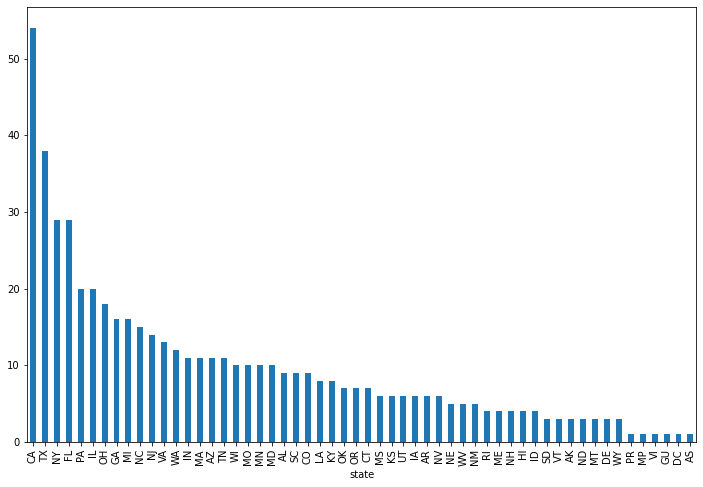

In [15]:
legislators.groupby('state').size().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))

In [16]:
gdpt = gdp_dollars.transpose()
new_header = gdpt.iloc[0] #grab the first row for the header
gdpt = gdpt[1:] #take the data less the header row
gdpt.columns = new_header #set the header row as the df header
gdpt = gdpt[1:] # remove currency row
gdpt

State,Connecticut,Maine,Massachusetts,New Hampshire,Rhode Island,Vermont,Delaware,District of Columbia,Maryland,New Jersey,...,Montana,Utah,Wyoming,Alaska,California,Hawaii,Nevada,Oregon,Washington,Overseas activity 1/
2020Q1,286287.0,70099.0,600436.0,89251.0,61776.0,34688.0,77074.0,147340.0,422760.0,646387.0,...,51948.0,196920.0,38834.0,53103.0,3083611.0,90324.0,184994.0,250597.0,609026.0,133566.0
2020Q2,257812.0,64704.0,544140.0,80750.0,56289.0,30758.0,71818.0,139171.0,387607.0,571006.0,...,47992.0,186766.0,33215.0,45945.0,2801947.0,77670.0,151094.0,228542.0,568716.0,132517.0
2020Q3,278870.0,70256.0,586020.0,88890.0,61653.0,33897.0,76815.0,144287.0,415082.0,624873.0,...,52341.0,200044.0,36181.0,48877.0,3042208.0,81035.0,172158.0,246357.0,619197.0,132066.0
2020Q4,282722.0,72027.0,599311.0,91593.0,62508.0,34397.0,77439.0,147421.0,417251.0,632051.0,...,53755.0,206518.0,37064.0,51355.0,3100985.0,82509.0,175529.0,249611.0,620076.0,136663.0
2021Q1,285112.0,73174.0,610700.0,92753.0,62340.0,35032.0,77392.0,147830.0,430607.0,649336.0,...,56453.0,211721.0,39303.0,52164.0,3207139.0,84183.0,180973.0,256567.0,636347.0,138201.0
2021Q2,293595.0,75214.0,629570.0,98746.0,65700.0,35703.0,79728.0,150577.0,431319.0,661895.0,...,58755.0,217148.0,40761.0,54056.0,3321704.0,89170.0,190799.0,262917.0,663121.0,142125.0
2021Q3,298612.0,76664.0,642038.0,99030.0,66894.0,36302.0,81546.0,153168.0,439028.0,677006.0,...,60020.0,222157.0,42102.0,55677.0,3384335.0,91947.0,195777.0,268864.0,674091.0,146180.0


In [17]:
state_gdp = gdpt.sum().reset_index()
state_gdp

,State,0
0,Connecticut,1983010.0
1,Maine,502138.0
2,Massachusetts,4212215.0
3,New Hampshire,641013.0
4,Rhode Island,437160.0
5,Vermont,240777.0
6,Delaware,541812.0
7,District of Columbia,1029794.0
8,Maryland,2943654.0
9,New Jersey,4462554.0


In [18]:
# state_gdp
gdp_2020 = gdpt.iloc[0:3].sum()
gdp_2021 = gdpt.iloc[4:8].sum()

In [19]:
gdp_summary = pd.concat([gdp_2020, gdp_2021], axis=1, join="inner")
gdp_summary = gdp_summary.sort_values(by="State")
gdp_summary.columns = ["2020", "2021"]
gdp_summary

,2020,2021
State,,
Alabama,673950.0,730904.0
Alaska,147925.0,161897.0
Arizona,1105868.0,1214949.0
Arkansas,388468.0,427699.0
California,8927766.0,9913178.0
Colorado,1139212.0,1246862.0
Connecticut,822969.0,877319.0
Delaware,225707.0,238666.0
District of Columbia,430798.0,451575.0


In [20]:
gdp_summary = gdp_summary.merge(states_df, how="inner", left_on="State", right_on="StateName")
gdp_summary

validated_states = gdp_summary.StateName.values
validated_states

array(['Arkansas', 'Connecticut', 'Indiana', 'Kansas', 'Kentucky',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'Oklahoma', 'Texas', 'Washington'], dtype=object)

In [21]:
# gdp_melt = gdp.melt()
# gdp_melt

In [22]:
gdp_trash = pd.concat([gdp_summary, states_df])
gdp_trash.drop(columns="StateName", inplace=True)
gdp_trash

,2020,2021,StateAbbrev
0,388468.0,427699.0,AR
1,822969.0,877319.0,CT
2,1112247.0,1243346.0,IN
3,519749.0,570923.0,KS
4,630623.0,693513.0,KY
...,...,...,...
52,NaN,NaN,GU
53,NaN,NaN,MP
54,NaN,NaN,PR
55,NaN,NaN,UM


In [23]:
# len(legislators)

legislators

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,...,opensecrets_id,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id
0,Brown,Sherrod,NaN,NaN,NaN,Sherrod Brown,1952-11-09,M,sen,OH,...,N00003535,S307,"H2OH13033,S6OH00163",5051.0,400050,27018.0,Sherrod Brown,NaN,29389.0,Sherrod Brown
1,Cantwell,Maria,NaN,NaN,NaN,Maria Cantwell,1958-10-13,F,sen,WA,...,N00007836,S275,"S8WA00194,H2WA01054",26137.0,300018,27122.0,Maria Cantwell,NaN,39310.0,Maria Cantwell
2,Cardin,Benjamin,L.,NaN,NaN,Benjamin L. Cardin,1943-10-05,M,sen,MD,...,N00001955,S308,"H6MD03177,S6MD03177",4004.0,400064,26888.0,Ben Cardin,NaN,15408.0,Ben Cardin
3,Carper,Thomas,Richard,NaN,NaN,Thomas R. Carper,1947-01-23,M,sen,DE,...,N00012508,S277,S8DE00079,663.0,300019,22421.0,Tom Carper,NaN,15015.0,Tom Carper
4,Casey,Robert,P.,Jr.,Bob,"Robert P. Casey, Jr.",1960-04-13,M,sen,PA,...,N00027503,S309,S6PA00217,47036.0,412246,2541.0,"Bob Casey, Jr.",NaN,40703.0,Bob Casey Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Stansbury,Melanie,Ann,NaN,NaN,Melanie A. Stansbury,1979-01-31,F,rep,NM,...,N00047871,NaN,H2NM01144,NaN,456861,NaN,Melanie Ann Stansbury,NaN,NaN,Melanie Stansbury
536,Ellzey,Jake,NaN,NaN,NaN,Jake Ellzey,1970-01-24,M,rep,TX,...,NaN,NaN,H8TX06266,NaN,456862,NaN,Jake Ellzey,NaN,NaN,Jake Ellzey
537,Brown,Shontel,M.,NaN,NaN,Shontel M. Brown,1975-06-24,F,rep,OH,...,NaN,NaN,H2OH11169,NaN,456863,NaN,NaN,NaN,NaN,Shontel Brown
538,Carey,Mike,NaN,NaN,NaN,Mike Carey,1971-03-13,M,rep,OH,...,NaN,NaN,H2OH15228,NaN,456864,NaN,NaN,NaN,NaN,Mike Carey (politician)


In [24]:
joined_leg = legislators.merge(gdp_trash, how="left", left_on="state", right_on="StateAbbrev")

#expect 540 rows returned
len(joined_leg)

694

In [25]:
joined_leg

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,...,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id,2020,2021,StateAbbrev
0,Brown,Sherrod,NaN,NaN,NaN,Sherrod Brown,1952-11-09,M,sen,OH,...,5051.0,400050,27018.0,Sherrod Brown,NaN,29389.0,Sherrod Brown,NaN,NaN,OH
1,Cantwell,Maria,NaN,NaN,NaN,Maria Cantwell,1958-10-13,F,sen,WA,...,26137.0,300018,27122.0,Maria Cantwell,NaN,39310.0,Maria Cantwell,1796939.0,1973559.0,WA
2,Cantwell,Maria,NaN,NaN,NaN,Maria Cantwell,1958-10-13,F,sen,WA,...,26137.0,300018,27122.0,Maria Cantwell,NaN,39310.0,Maria Cantwell,NaN,NaN,WA
3,Cardin,Benjamin,L.,NaN,NaN,Benjamin L. Cardin,1943-10-05,M,sen,MD,...,4004.0,400064,26888.0,Ben Cardin,NaN,15408.0,Ben Cardin,NaN,NaN,MD
4,Carper,Thomas,Richard,NaN,NaN,Thomas R. Carper,1947-01-23,M,sen,DE,...,663.0,300019,22421.0,Tom Carper,NaN,15015.0,Tom Carper,NaN,NaN,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,Ellzey,Jake,NaN,NaN,NaN,Jake Ellzey,1970-01-24,M,rep,TX,...,NaN,456862,NaN,Jake Ellzey,NaN,NaN,Jake Ellzey,5277305.0,5836694.0,TX
690,Ellzey,Jake,NaN,NaN,NaN,Jake Ellzey,1970-01-24,M,rep,TX,...,NaN,456862,NaN,Jake Ellzey,NaN,NaN,Jake Ellzey,NaN,NaN,TX
691,Brown,Shontel,M.,NaN,NaN,Shontel M. Brown,1975-06-24,F,rep,OH,...,NaN,456863,NaN,NaN,NaN,NaN,Shontel Brown,NaN,NaN,OH
692,Carey,Mike,NaN,NaN,NaN,Mike Carey,1971-03-13,M,rep,OH,...,NaN,456864,NaN,NaN,NaN,NaN,Mike Carey (politician),NaN,NaN,OH


<AxesSubplot:xlabel='gender'>

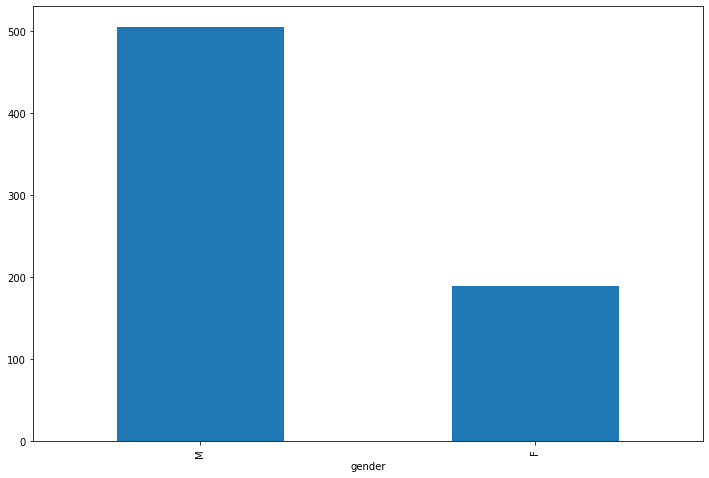

In [26]:
joined_leg.groupby('gender').size().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))